In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/MyDrive/Domaci_4/

/content/drive/MyDrive/Domaci_4


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('data_2.csv',header=None)

In [ ]:
X_dataset=df.iloc[:,:6]
Y_dataset=df.iloc[:,6]
#standardizacija
X_dataset=np.array(X_dataset)
Y_dataset=np.array(Y_dataset)
srvr = np.zeros(X_dataset.shape[1])
stdev = np.zeros(X_dataset.shape[1])
for i in range(X_dataset.shape[1]):
    srvr[i] = np.mean(X_dataset[:, i])
    stdev[i] = np.std(X_dataset[:, i])

for i in range(X_dataset.shape[1]):
    for j in range(X_dataset.shape[0]):
        X_dataset[j][i] = ((X_dataset[j][i]) - srvr[i]) / stdev[i]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_dataset,Y_dataset)
m,n=X_train.shape
m_v,n_v=X_test.shape


In [ ]:
#RF dubina
number_tree=np.arange(6,106,5)
depth=np.array([1,6,12,20])
N=20
RF_train_accu=np.zeros((N,4))
RF_test_accu=np.zeros((N,4))
for i, tree in enumerate(number_tree):
   for j,d in enumerate(depth):
        clf=RandomForestClassifier(n_estimators=tree,max_depth=d)
        clf = clf.fit(X_train,Y_train)

        predikcija_t=clf.predict(X_train)
        #print(predikcija_t.shape)
        
        #print(predikcija_t.shape)
        predikcija_v=clf.predict(X_test)
        predikcija_t,predikcija_v=predikcija_t.reshape(m,1),predikcija_v.reshape(m_v,1)
        
        #računanje tacnosti na trening i validacionom skupu
        RF_train_accu[i,j]=(m-np.sum(np.abs(Y_train.reshape(m,1)-predikcija_t)))/m
        RF_test_accu[i,j]=(m_v-np.sum(np.abs(Y_test.reshape(m_v,1)-predikcija_v)))/m_v        

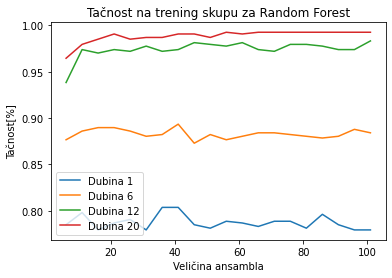

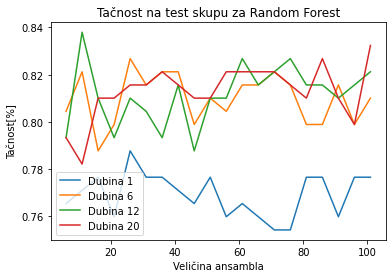

In [ ]:
# iscrtavanje tačnosti za trening i validacioni skup podataka
plt.figure()
plt.title('Tačnost na trening skupu za Random Forest')
plt.xlabel('Veličina ansambla')
plt.ylabel('Tačnost[%]')
plt.plot(number_tree,RF_train_accu[:,0],label='Dubina 1')
plt.plot(number_tree,RF_train_accu[:,1],label='Dubina 6')
plt.plot(number_tree,RF_train_accu[:,2],label='Dubina 12')
plt.plot(number_tree,RF_train_accu[:,3],label='Dubina 20')
plt.legend(loc='best')
plt.figure()
plt.title('Tačnost na test skupu za Random Forest')
plt.xlabel('Veličina ansambla')
plt.ylabel('Tačnost[%]')
plt.plot(number_tree,RF_test_accu[:,0],label='Dubina 1')
plt.plot(number_tree,RF_test_accu[:,1],label='Dubina 6')
plt.plot(number_tree,RF_test_accu[:,2],label='Dubina 12')
plt.plot(number_tree,RF_test_accu[:,3],label='Dubina 20')
plt.legend(loc='best')

In [ ]:
#Gradient Boosting
GB_train_accu=np.zeros((N,4))
GB_test_accu=np.zeros((N,4))
for i, tree in enumerate(number_tree):
   for j,d in enumerate(depth):
        clf=GradientBoostingClassifier(n_estimators=tree,max_depth=d)
        clf = clf.fit(X_train,Y_train)

        predikcija_t=clf.predict(X_train)
        #print(predikcija_t.shape)
        
       
        predikcija_v=clf.predict(X_test)
        predikcija_t,predikcija_v=predikcija_t.reshape(m,1),predikcija_v.reshape(m_v,1)
        
        #računanje tacnosti na trening i validacionom skupu
        GB_train_accu[i,j]=(m-np.sum(np.abs(Y_train.reshape(m,1)-predikcija_t)))/m
        GB_test_accu[i,j]=(m_v-np.sum(np.abs(Y_test.reshape(m_v,1)-predikcija_v)))/m_v

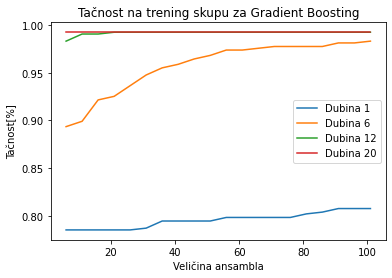

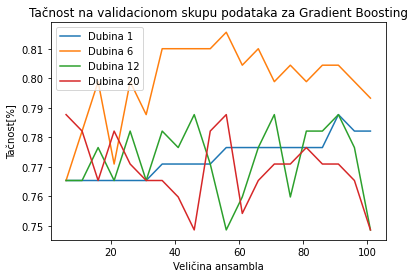

In [ ]:
# iscrtavanje tačnosti za trening i validacioni skup podataka
plt.figure()
plt.title('Tačnost na trening skupu za Gradient Boosting')
plt.xlabel('Veličina ansambla')
plt.ylabel('Tačnost[%]')
plt.plot(number_tree,GB_train_accu[:,0],label='Dubina 1')
plt.plot(number_tree,GB_train_accu[:,1],label='Dubina 6')
plt.plot(number_tree,GB_train_accu[:,2],label='Dubina 12')
plt.plot(number_tree,GB_train_accu[:,3],label='Dubina 20')
plt.legend(loc='best')

plt.figure()
plt.title('Tačnost na validacionom skupu podataka za Gradient Boosting')
plt.xlabel('Veličina ansambla')
plt.ylabel('Tačnost[%]')
plt.plot(number_tree,GB_test_accu[:,0],label='Dubina 1')
plt.plot(number_tree,GB_test_accu[:,1],label='Dubina 6')
plt.plot(number_tree,GB_test_accu[:,2],label='Dubina 12')
plt.plot(number_tree,GB_test_accu[:,3],label='Dubina 20')
plt.legend(loc='best')

In [ ]:
#Random Forest Classifier nipermapametar max_features
a=np.sqrt(n)
podskup=np.array([1,2,3,6])#koren je 2, log je 1
RF_train_accu=np.zeros((N,4))
RF_test_accu=np.zeros((N,4))
for i, tree in enumerate(number_tree):
   for j,s in enumerate(podskup):
        clf=RandomForestClassifier(n_estimators=tree,max_features=s)
        clf = clf.fit(X_train,Y_train)

        predikcija_t=clf.predict(X_train)
        #print(predikcija_t.shape)
        
        #print(predikcija_t.shape)
        predikcija_v=clf.predict(X_test)
        predikcija_t,predikcija_v=predikcija_t.reshape(m,1),predikcija_v.reshape(m_v,1)
        
        #računanje tacnosti na trening i validacionom skupu
        RF_train_accu[i,j]=(m-np.sum(np.abs(Y_train.reshape(m,1)-predikcija_t)))/m
        RF_test_accu[i,j]=(m_v-np.sum(np.abs(Y_test.reshape(m_v,1)-predikcija_v)))/m_v 

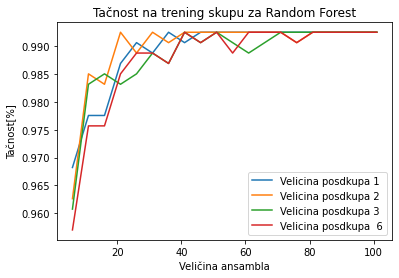

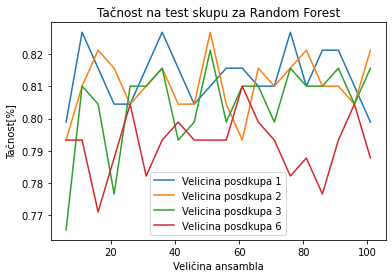

In [ ]:
# iscrtavanje tačnosti za trening i validacioni skup podataka
plt.figure()
plt.title('Tačnost na trening skupu za Random Forest')
plt.xlabel('Veličina ansambla')
plt.ylabel('Tačnost[%]')
plt.plot(number_tree,RF_train_accu[:,0],label='Velicina posdkupa 1')
plt.plot(number_tree,RF_train_accu[:,1],label='Velicina posdkupa 2')
plt.plot(number_tree,RF_train_accu[:,2],label='Velicina posdkupa 3')
plt.plot(number_tree,RF_train_accu[:,3],label='Velicina posdkupa 6')
plt.legend(loc='best')
plt.figure()
plt.title('Tačnost na test skupu za Random Forest')
plt.xlabel('Veličina ansambla')
plt.ylabel('Tačnost[%]')
plt.plot(number_tree,RF_test_accu[:,0],label='Velicina posdkupa 1')
plt.plot(number_tree,RF_test_accu[:,1],label='Velicina posdkupa 2')
plt.plot(number_tree,RF_test_accu[:,2],label='Velicina posdkupa 3')
plt.plot(number_tree,RF_test_accu[:,3],label='Velicina posdkupa 6')

plt.legend(loc='best')

In [ ]:
#Gradient Boosting hiperparametar stopa ucenja
learning_rate=np.arange(0.05,0.3,0.02)
s=len(learning_rate)
GB_train_accu=np.zeros(shape=(N,s))
GB_test_accu=np.zeros(shape=(N,s))
for i, tree in enumerate(number_tree):
   for j,lr in enumerate(learning_rate):
        clf=GradientBoostingClassifier(n_estimators=tree,learning_rate=lr)
        clf = clf.fit(X_train,Y_train)

        predikcija_t=clf.predict(X_train)
        #print(predikcija_t.shape)
        
       
        predikcija_v=clf.predict(X_test)
        predikcija_t,predikcija_v=predikcija_t.reshape(m,1),predikcija_v.reshape(m_v,1)
        
        #računanje tacnosti na trening i validacionom skupu
        GB_train_accu[i,j]=(m-np.sum(np.abs(Y_train.reshape(m,1)-predikcija_t)))/m
        GB_test_accu[i,j]=(m_v-np.sum(np.abs(Y_test.reshape(m_v,1)-predikcija_v)))/m_v

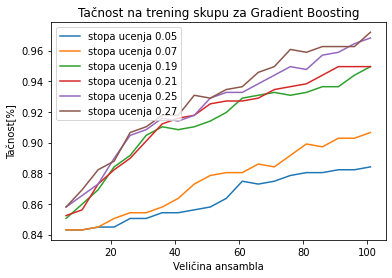

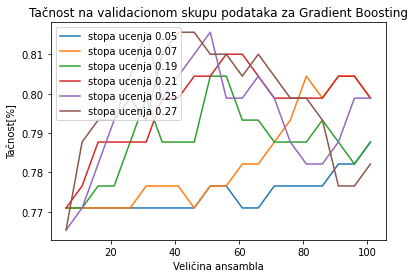

In [ ]:
plt.figure()
plt.title('Tačnost na trening skupu za Gradient Boosting')
plt.xlabel('Veličina ansambla')
plt.ylabel('Tačnost[%]')
plt.plot(number_tree,GB_train_accu[:,0],label='stopa ucenja 0.05')
plt.plot(number_tree,GB_train_accu[:,1],label='stopa ucenja 0.07')

plt.plot(number_tree,GB_train_accu[:,7],label='stopa ucenja 0.19'
plt.plot(number_tree,GB_train_accu[:,8],label='stopa ucenja 0.21')
plt.plot(number_tree,GB_train_accu[:,10],label='stopa ucenja 0.25')
plt.plot(number_tree,GB_train_accu[:,11],label='stopa ucenja 0.27')

plt.legend(loc='best')

plt.figure()
plt.title('Tačnost na validacionom skupu podataka za Gradient Boosting')
plt.xlabel('Veličina ansambla')
plt.ylabel('Tačnost[%]')
plt.plot(number_tree,GB_test_accu[:,0],label='stopa ucenja 0.05')
plt.plot(number_tree,GB_test_accu[:,1],label='stopa ucenja 0.07')

plt.plot(number_tree,GB_test_accu[:,7],label='stopa ucenja 0.19')
plt.plot(number_tree,GB_test_accu[:,8],label='stopa ucenja 0.21')
plt.plot(number_tree,GB_test_accu[:,10],label='stopa ucenja 0.25')
plt.plot(number_tree,GB_test_accu[:,11],label='stopa ucenja 0.27')

plt.legend(loc='best')